In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("../data/processed/iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

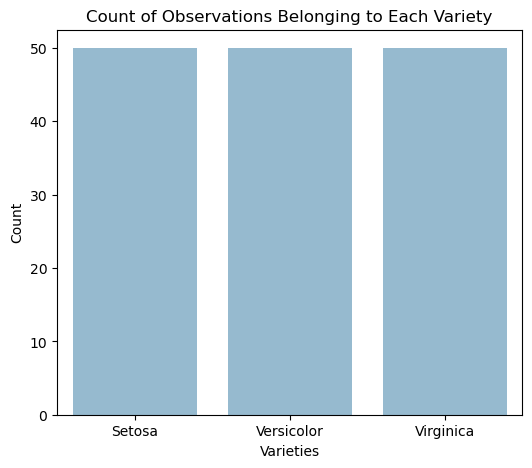

In [5]:
plt.figure(figsize = (6, 5))
sns.countplot(x='variety', data=data, color='#8CBCD9')

plt.xlabel('Varieties')
plt.ylabel('Count')
plt.title('Count of Observations Belonging to Each Variety')

plt.show()

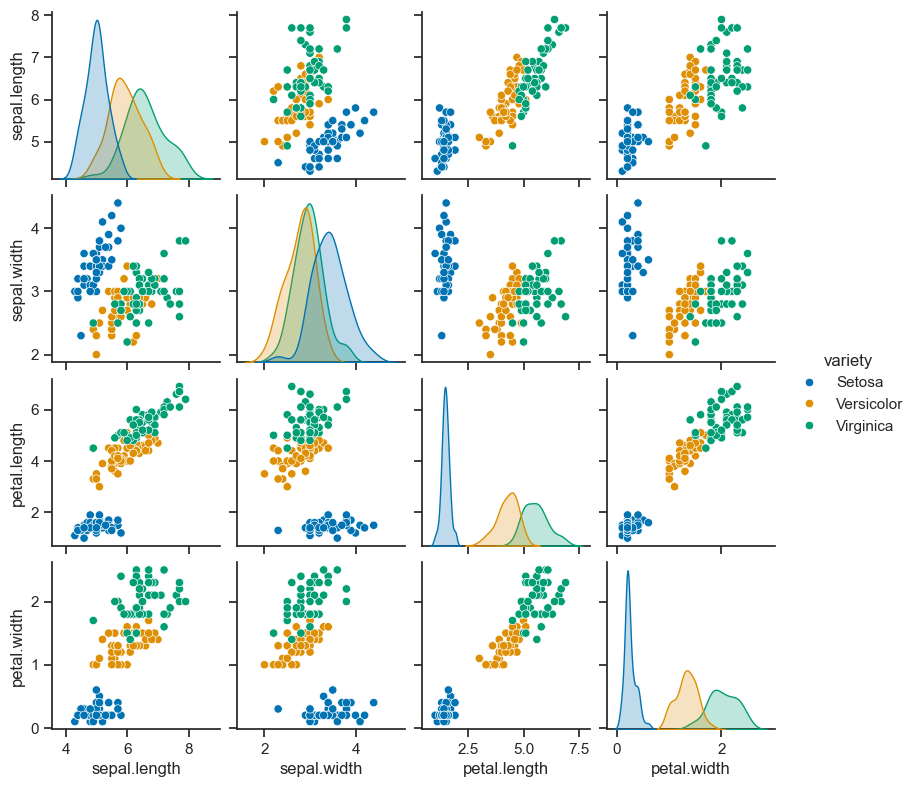

In [6]:
sns.set(style="ticks")
sns.pairplot(data, hue = "variety", height = 2, palette = "colorblind")

In [7]:
# Split X and Y
X = data.drop(['variety'], axis=1)
Y = data['variety']

# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [8]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120, 4)
Y_test.shape: (30,)


In [9]:
# Train the classifier
rf_classifier = RandomForestClassifier(random_state = 7)
rf_classifier.fit(X_train, Y_train)

# Predict labels
Y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')

# Create metrics DataFrame
metrics_dict = {'Accuracy': [round(accuracy, 3)], 'Precision': [round(precision, 3)]}
metrics_df = pd.DataFrame(metrics_dict, index=[0])
print(metrics_df)

   Accuracy  Precision
0     0.867      0.867


In [10]:
# Save model coefficients as CSV for report
metrics_df.to_csv("../src/figures/model_metrics.csv", index=False)

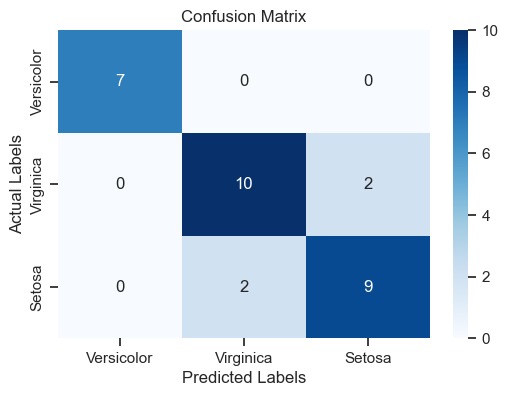

In [11]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(Y), yticklabels=set(Y))
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()